In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
data = pd.read_csv('final_twitterDatanew.csv')
data = data[~data.duplicated(subset = ['text'])]
data

,user_location,latitude,longitude,created_at,id,text,source,truncated,in_reply_to_status_id,in_reply_to_user_id,...,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,coordinates,place,is_quote_status,favorite_count,lang,image_url
0,"London, England",51.507336,-0.127650,2023-06-24 21:16:45+00:00,1672715409433190400,@HothfieldPlace All that pollution what “appar...,Twitter for iPhone,False,1.672699e+18,1.406968e+18,...,0,312,704,2022-12-20 15:52:12+00:00,NaN,NaN,False,0,en,NaN
1,East Cheshire,53.089516,-2.432569,2023-06-24 21:08:08+00:00,1672713238255992834,@PetenShirl Means a lower gear and mor polluti...,Twitter Web App,False,1.671498e+18,7.188028e+07,...,1,134,3104,2022-08-31 18:58:21+00:00,NaN,NaN,False,0,en,NaN
2,"Kensington, London",51.500842,-0.179150,2023-06-24 20:39:56+00:00,1672706144815415296,@toryboypierce @mailplus Londoners want ULEZ\n...,Twitter for iPhone,False,1.672705e+18,1.944467e+09,...,0,9438,4711,2022-04-07 15:05:13+00:00,NaN,NaN,False,2,en,https://pbs.twimg.com/tweet_video_thumb/FzalXs...
3,UK,54.702354,-3.276575,2023-06-24 20:38:54+00:00,1672705883921326081,#LTN have reduced road space redundancy in the...,Twitter for Android,False,NaN,NaN,...,3,62642,54919,2020-10-25 15:08:34+00:00,NaN,NaN,True,3,en,NaN
4,"Birmingham, England",52.479699,-1.902691,2023-06-24 20:33:47+00:00,1672704594655191047,@YBcabbie @suemitch2017 @BBC @Keir_Starmer @Co...,Twitter for Android,False,1.672692e+18,1.849338e+09,...,4,34524,28163,2020-03-13 11:47:00+00:00,NaN,NaN,False,0,en,https://pbs.twimg.com/media/Fzaj9tpWIAEcwJa.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,Auvergne,54.421697,-1.234967,2023-06-19 02:02:15+00:00,1670612929178116097,"""@JackyBerland @BonGrosDodo This concerns the ...",Twitter Web App,False,1.670613e+18,1.466109e+18,...,8,9420,6602,2021-12-01 18:15:45+00:00,NaN,NaN,False,1,fr,NaN
7679,"Boulogne-Billancourt, France",NaN,NaN,2023-06-18 22:05:34+00:00,1670553363966984196,"Well, that's great, I must say. So, in additio...",Twitter for iPhone,False,NaN,NaN,...,0,1939,3378,2022-10-01 17:19:03+00:00,NaN,"Paris, France",True,3,fr,NaN
7680,"Paris, France",NaN,NaN,2023-06-18 19:13:07+00:00,1670509969148354560,"""@pascalCenteam @f_philippot I'm responding to...",Twitter for iPhone,False,1.670505e+18,8.114870e+08,...,1,27016,54241,2021-10-04 19:00:22+00:00,NaN,NaN,True,0,fr,NaN
7681,"La Roche-sur-Yon, France",NaN,NaN,2023-06-18 18:35:13+00:00,1670500430122561542,"'@Bruno_Attal_ And pollution, what a big mess,...",Twitter for Android,False,1.670438e+18,1.433049e+18,...,0,182,405,2023-03-26 20:27:23+00:00,NaN,NaN,False,1,fr,NaN


In [23]:
df= data[['text']]
df

,text
0,@HothfieldPlace All that pollution what “appar...
1,@PetenShirl Means a lower gear and mor polluti...
2,@toryboypierce @mailplus Londoners want ULEZ\n...
3,#LTN have reduced road space redundancy in the...
4,@YBcabbie @suemitch2017 @BBC @Keir_Starmer @Co...
...,...
7678,"""@JackyBerland @BonGrosDodo This concerns the ..."
7679,"Well, that's great, I must say. So, in additio..."
7680,"""@pascalCenteam @f_philippot I'm responding to..."
7681,"'@Bruno_Attal_ And pollution, what a big mess,..."


Data Cleaning
-------------
- Removing Hashtags and username mentions
- Data Cleaning: We'll preprocess the tweet data to remove noise and irrelevant information, perform tokenization, and remove stop words and special characters.

In [24]:
import re
import pandas as pd

def clean_tweet(tweet):
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove words starting with '@'
    tweet = re.sub(r'@\w+', '', tweet)
    return tweet



# Apply clean_tweet function to the 'text' column in the DataFrame
df['cleaned_text'] = df['text'].apply(clean_tweet)

df

/tmp/ipykernel_4724/2509723431.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(clean_tweet)


,text,cleaned_text
0,@HothfieldPlace All that pollution what “appar...,All that pollution what “apparently” is a pri...
1,@PetenShirl Means a lower gear and mor polluti...,Means a lower gear and mor pollution. Good ...
2,@toryboypierce @mailplus Londoners want ULEZ\n...,Londoners want ULEZ\nWe are fed up with chil...
3,#LTN have reduced road space redundancy in the...,have reduced road space redundancy in the hea...
4,@YBcabbie @suemitch2017 @BBC @Keir_Starmer @Co...,I watched the man who bought his own poll...
...,...,...
7678,"""@JackyBerland @BonGrosDodo This concerns the ...",""" This concerns the decline in soil fertility..."
7679,"Well, that's great, I must say. So, in additio...","Well, that's great, I must say. So, in additio..."
7680,"""@pascalCenteam @f_philippot I'm responding to...",""" I'm responding to react to all this mental ..."
7681,"'@Bruno_Attal_ And pollution, what a big mess,...","' And pollution, what a big mess, all for a vi..."


In [25]:
# Load the regular expression library
import re
# Remove punctuation
papers = pd.DataFrame()
papers['paper_text_processed'] = df['cleaned_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
/tmp/ipykernel_4724/2277225787.py:5: DeprecationWarning: invalid escape sequence \.
  papers['paper_text_processed'] = df['cleaned_text'].map(lambda x: re.sub('[,\.!?]', '', x))


0     all that pollution what “apparently” is a pri...
1     means a lower gear and mor pollution   good d...
2      londoners want ulez\nwe are fed up with chil...
3     have reduced road space redundancy in the hea...
4         i watched the man who bought his own poll...
Name: paper_text_processed, dtype: object

In [26]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['rT', 'im', 'rt', 'hes', 'Rt', 'ye', 'one', 'nm', 'shit', 'yeah', 'bb', 'https',
                 'tco', 'amp', 'sa', 'but', 'in', 'my', 'your','gt', 'water', 'waste','ur', 'youu', 'bb'," "])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/c4leb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['pollution', 'apparently', 'priority', 'southwark', 'council']


In [27]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [28]:
from pprint import pprint
import gensim

# Number of topics
num_topics = 15

# Build LDA model with LdaModel
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=num_topics,
                                   alpha='auto',
                                   passes=20)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"electricity" + 0.010*"power" + 0.009*"nuclear" + 0.007*"today" + '
  '0.007*"throw" + 0.007*"pure" + 0.006*"getting" + 0.005*"going" + '
  '0.005*"rains" + 0.005*"thank"'),
 (1,
  '0.011*"bottle" + 0.008*"new" + 0.008*"hot" + 0.007*"time" + 0.007*"believe" '
  '+ 0.006*"tap" + 0.006*"head" + 0.006*"eating" + 0.006*"salt" + '
  '0.006*"cannot"'),
 (2,
  '0.017*"like" + 0.015*"pollution" + 0.011*"air" + 0.008*"looks" + '
  '0.008*"fucking" + 0.008*"got" + 0.007*"dust" + 0.005*"think" + 0.005*"road" '
  '+ 0.005*"responsible"'),
 (3,
  '0.016*"life" + 0.014*"people" + 0.014*"time" + 0.008*"else" + 0.007*"right" '
  '+ 0.007*"way" + 0.006*"made" + 0.006*"pollution" + 0.006*"air" + '
  '0.005*"literally"'),
 (4,
  '0.012*"always" + 0.012*"without" + 0.011*"women" + 0.009*"days" + '
  '0.009*"men" + 0.007*"face" + 0.007*"smile" + 0.007*"money" + 0.006*"space" '
  '+ 0.006*"earth"'),
 (5,
  '0.013*"pollution" + 0.011*"love" + 0.009*"see" + 0.008*"according" + '
  '0.008*"alread

In [29]:
# Print the topics in the desired format
for idx, topic in lda_model.print_topics(-1):
    topic_words = [word for word, _ in lda_model.show_topic(idx)]
    topic_words_str = ", ".join(topic_words)
    print(f"Topic {idx}: {topic_words_str}")

Topic 0: electricity, power, nuclear, today, throw, pure, getting, going, rains, thank
Topic 1: bottle, new, hot, time, believe, tap, head, eating, salt, cannot
Topic 2: like, pollution, air, looks, fucking, got, dust, think, road, responsible
Topic 3: life, people, time, else, right, way, made, pollution, air, literally
Topic 4: always, without, women, days, men, face, smile, money, space, earth
Topic 5: pollution, love, see, according, already, light, turn, like, region, na
Topic 6: drink, day, lot, today, eat, forget, wish, beautiful, happy, good
Topic 7: like, plastic, something, earth, cold, us, system, many, bath, cup
Topic 8: time, like, get, people, would, go, know, want, let, much
Topic 9: night, great, best, lots, hold, saw, ever, taking, side, known
Topic 10: come, hour, serious, breaks, hours, half, paying, drank, bucket, volunteers
Topic 11: pollution, air, us, much, health, state, must, first, traffic, world
Topic 12: pollution, river, air, since, need, cars, people, low,

In [30]:
# !pip install pyLDAvis

In [32]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

# Create the 'results' directory if it doesn't exist
os.makedirs('./results/', exist_ok=True)

# Perform the visualization preparation and save the data
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, n_jobs=1)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Save the pyLDAvis visualization as an HTML file
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_' + str(num_topics) + '.html')

LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.202480 -0.131429       1        1  14.101952
13     0.167047 -0.053048       2        1  11.194205
11     0.114187  0.169689       3        1   9.323422
3      0.074279 -0.031922       4        1   7.744849
7      0.057725 -0.000909       5        1   7.125965
12     0.064300  0.087746       6        1   6.703513
6     -0.082410 -0.198016       7        1   6.236864
5     -0.048983  0.055076       8        1   5.935775
2      0.005170  0.103574       9        1   5.669914
9     -0.051582 -0.027353      10        1   5.141088
1     -0.071394  0.004797      11        1   5.083120
0     -0.103128 -0.022192      12        1   4.800591
4     -0.095234  0.022779      13        1   4.176244
14    -0.116604  0.010924      14        1   3.405386
10    -0.115853  0.010283      15        1   3.357113, topic_info=           Term        Freq       Total Category  logprob  loglift
1538      drink  250.000000  250.000000  Default  30.0000  30.0000
2     pollution  749.000000  749.000000  Default  29.0000  29.0000
909         day  203.000000  203.000000  Default  28.0000  28.0000
474        time  530.000000  530.000000  Default  27.0000  27.0000
1236        lot   93.000000   93.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
5164       rent    7.554668   12.436482  Topic15  -5.5602   2.8956
5327  waterbomb    7.377902   11.202202  Topic15  -5.5839   2.9765
1019       days    8.553257   60.721587  Topic15  -5.4361   1.4341
474        time    9.417404  530.260858  Topic15  -5.3398  -0.6367
523       lives    7.549724   21.904796  Topic15  -5.5609   2.3289

[913 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6840      1  0.915973        abt
3441      4  0.877483     accept
402       8  0.935109  according
402       9  0.034634  according
5285     14  0.908765    actions
...     ...       ...        ...
2528      1  0.756280        yet
2528      6  0.219565        yet
2528      8  0.024396        yet
212       5  0.864390       york
7275     10  0.863040    youtube

[1828 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 14, 12, 4, 8, 13, 7, 6, 3, 10, 2, 1, 5, 15, 11])

In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Data cleaning function
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)

    # Remove special characters and numbers
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Tokenization
    words = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Join words back to form the cleaned tweet
    cleaned_tweet = " ".join(words)
    return cleaned_tweet

# Apply data cleaning to the 'text' column in the DataFrame
df['cleaned_text2'] = df['cleaned_text'].apply(clean_tweet)
df

/tmp/ipykernel_4724/906982645.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text2'] = df['cleaned_text'].apply(clean_tweet)


,text,cleaned_text,cleaned_text2
0,@HothfieldPlace All that pollution what “appar...,All that pollution what “apparently” is a pri...,pollution apparently priority southwark council
1,@PetenShirl Means a lower gear and mor polluti...,Means a lower gear and mor pollution. Good ...,means lower gear mor pollution good decision w...
2,@toryboypierce @mailplus Londoners want ULEZ\n...,Londoners want ULEZ\nWe are fed up with chil...,londoners want ulez fed children dying chronic...
3,#LTN have reduced road space redundancy in the...,have reduced road space redundancy in the hea...,reduced road space redundancy heart capital me...
4,@YBcabbie @suemitch2017 @BBC @Keir_Starmer @Co...,I watched the man who bought his own poll...,watched man bought pollution detector gov used...
...,...,...,...
7678,"""@JackyBerland @BonGrosDodo This concerns the ...",""" This concerns the decline in soil fertility...",concerns decline soil fertility decrease yield...
7679,"Well, that's great, I must say. So, in additio...","Well, that's great, I must say. So, in additio...",well thats great must say addition car terrori...
7680,"""@pascalCenteam @f_philippot I'm responding to...",""" I'm responding to react to all this mental ...",im responding react mental pollution raoult al...
7681,"'@Bruno_Attal_ And pollution, what a big mess,...","' And pollution, what a big mess, all for a vi...",pollution big mess video outrageous


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/c4leb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

/home/c4leb/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/c4leb/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/c4leb/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/home/c4leb/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orienta

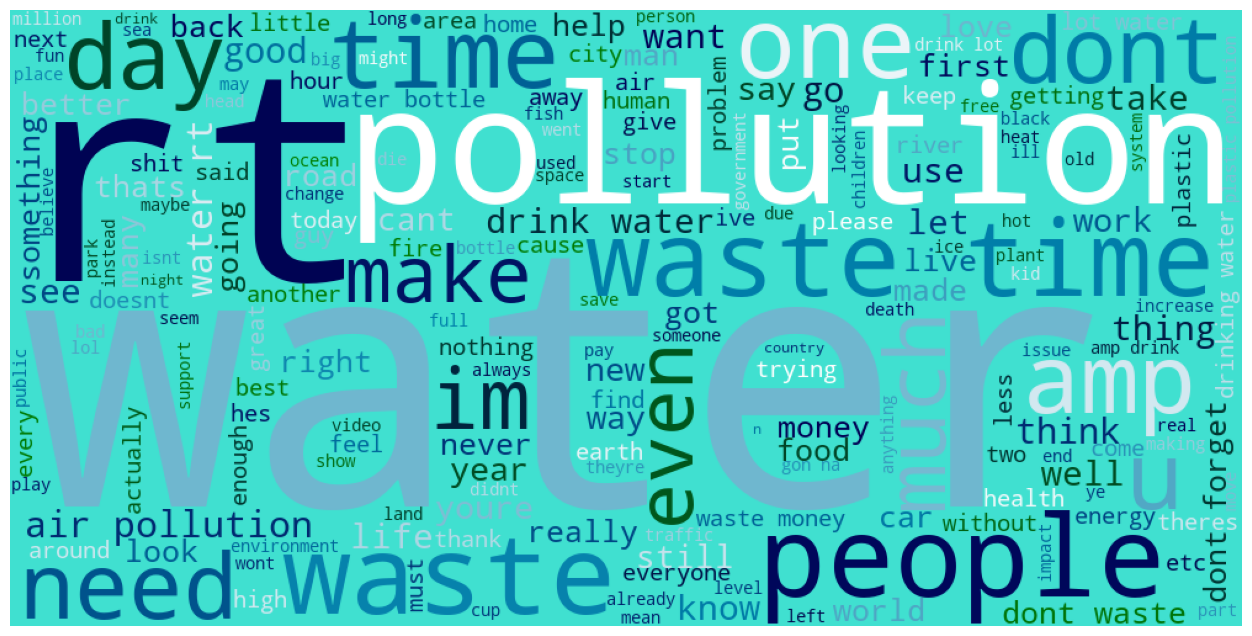

In [14]:
def text_data(df):
    df = df.cleaned_text2.values
    df = ','.join(str(x) for x in df)
    return df
def plot_cloud(wordcloud):
    plt.figure(figsize=(18, 8))
    stop_words = ['rT', 'im', 'rt', 'hes', 'Rt', 'ye', 'one', 'nm', 'shit', 'yeah', 'bb', 'https',
                 'a', 'an', 'the', 'and', 'it', 'for', 'or', 'but', 'in', 'my', 'your',
                  'our', 'and' 'their', 'ur', 'youu', 'bb'," "]
    plt.imshow(wordcloud)
    plt.axis("off");
    
wordcloud = WordCloud(width = 1000, height = 500, background_color='#40E0D0', 
                      colormap="ocean",  random_state=10).generate(text_data(df))
plot_cloud(wordcloud)

In [15]:
df

,text,cleaned_text,cleaned_text2
0,@HothfieldPlace All that pollution what “appar...,All that pollution what “apparently” is a pri...,pollution apparently priority southwark council
1,@PetenShirl Means a lower gear and mor polluti...,Means a lower gear and mor pollution. Good ...,means lower gear mor pollution good decision w...
2,@toryboypierce @mailplus Londoners want ULEZ\n...,Londoners want ULEZ\nWe are fed up with chil...,londoners want ulez fed children dying chronic...
3,#LTN have reduced road space redundancy in the...,have reduced road space redundancy in the hea...,reduced road space redundancy heart capital me...
4,@YBcabbie @suemitch2017 @BBC @Keir_Starmer @Co...,I watched the man who bought his own poll...,watched man bought pollution detector gov used...
...,...,...,...
7678,"""@JackyBerland @BonGrosDodo This concerns the ...",""" This concerns the decline in soil fertility...",concerns decline soil fertility decrease yield...
7679,"Well, that's great, I must say. So, in additio...","Well, that's great, I must say. So, in additio...",well thats great must say addition car terrori...
7680,"""@pascalCenteam @f_philippot I'm responding to...",""" I'm responding to react to all this mental ...",im responding react mental pollution raoult al...
7681,"'@Bruno_Attal_ And pollution, what a big mess,...","' And pollution, what a big mess, all for a vi...",pollution big mess video outrageous


In [16]:
import gensim
from gensim import corpora
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Assuming 'df' is the DataFrame with a column named 'text' containing the preprocessed tweets
tweets = df["cleaned_text2"].tolist()

# Remove outliers (you can inspect your entire dataset and remove irrelevant tweets)

# Tokenize the tweets (assuming tweets are already preprocessed and space-separated)
tweets_tokenized = [tweet.split() for tweet in tweets]

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_filtered = [[word for word in tweet if word not in stop_words] for tweet in tweets_tokenized]

# Porter stemming
stemmer = PorterStemmer()
tweets_stemmed = [[stemmer.stem(word) for word in tweet] for tweet in tweets_filtered]

# Handle common typos and abbreviations (customize as needed)
# Example: Replace 'u' with 'you', 'rt' with 'retweet', etc.
custom_replacements = {
    'u': 'you',
    'rt': 'retweet',
    'im': 'I am',
    'k': 'ok',
    # Add more replacements as needed
}
tweets_corrected = [[custom_replacements.get(word, word) for word in tweet] for tweet in tweets_stemmed]

# Create a dictionary and a corpus (word count representation) for LDA
dictionary = corpora.Dictionary(tweets_corrected)
corpus = [dictionary.doc2bow(tweet) for tweet in tweets_corrected]

# Train the LDA model
num_topics_lda = 10  # Set the number of topics for LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics_lda, id2word=dictionary, passes=10)

# Print the topics in the desired format
for idx, topic in lda_model.print_topics(-1):
    topic_words = [word for word, _ in lda_model.show_topic(idx)]
    topic_words_str = ", ".join(topic_words)
    print(f"Topic {idx}: {topic_words_str}")


[nltk_data] Downloading package stopwords to /home/c4leb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: water, retweet, state, wast, follow, first, amp, like, govern, unit
Topic 1: wast, retweet, water, time, pollut, dont, would, peopl, block, alreadi
Topic 2: water, beach, retweet, plant, may, pollut, blow, live, plane, nuclear
Topic 3: water, wast, retweet, time, money, like, go, get, dont, without
Topic 4: water, retweet, pollut, us, time, wast, translat, river, new, gt
Topic 5: water, retweet, like, go, let, wast, bottl, you, put, get
Topic 6: water, retweet, time, wast, like, peopl, say, think, sign, still
Topic 7: water, pollut, pari, retweet, everyth, dont, health, fact, amp, pic
Topic 8: water, drink, dont, retweet, day, like, get, I am, wast, need
Topic 9: pollut, air, plastic, amp, peopl, caus, work, car, increas, clean


---------------------
1. Non-negative Matrix Factorization (NMF)

In [17]:
import gensim
from gensim import corpora
# Handle common typos and abbreviations (customize as needed)
# Example: Replace 'u' with 'you', 'rt' with 'retweet', etc.
custom_replacements = {
    'u': 'you',
    'rt': 'retweet',
    'im': 'I am',
    'ur': 'your',
    'k': 'ok',
    'g':'',
    'f':'',
    # Add more replacements as needed
}
tweets_corrected = [[custom_replacements.get(word, word) for word in tweet] for tweet in tweets_stemmed]

# Assuming 'df' is the DataFrame with a column named 'cleaned_text2' containing the preprocessed tweets
tweets = tweets_corrected

# Tokenize the tweets (assuming tweets are already preprocessed and space-separated)
# tweets_tokenized = [tweet.split() for tweet in tweets]


# Create a dictionary and a corpus (word count representation) for LDA
dictionary = corpora.Dictionary(tweets_corrected)
corpus = [dictionary.doc2bow(tweet) for tweet in tweets_tokenized]

# Train the LDA model
num_topics_lda = 10  # Set the number of topics for LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics_lda, id2word=dictionary, passes=10)

# Print the topics in the desired format
for idx, topic in lda_model.print_topics(-1):
    topic_words = [word for word, _ in lda_model.show_topic(idx)]
    topic_words_str = ", ".join(topic_words)
    print(f"Topic {idx}: {topic_words_str}")


Topic 0: water, like, plastic, feel, time, take, even, well, need, would
Topic 1: water, like, one, hot, us, get, made, river, heat, okay
Topic 2: water, time, also, great, like, last, thank, nuclear, hell, n
Topic 3: money, time, air, state, man, public, etc, tax, first, water
Topic 4: water, air, high, food, amp, like, green, one, look, save
Topic 5: water, need, clean, time, think, new, get, air, help, way
Topic 6: water, drink, day, dont, amp, today, eat, lot, love, good
Topic 7: water, na, gon, night, also, small, event, like, old, take
Topic 8: children, traffic, park, region, gt, light, due, mass, side, product
Topic 9: dont, time, water, want, get, know, go, without, see, life


------------
2. Hierarchical Dirichlet Process (HDP)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming 'data' is a DataFrame with a column named 'text' containing the preprocessed tweets
tweets = df["cleaned_text2"].tolist()

# Convert the preprocessed tweets to a TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=1000)  # Set the max_features to control the number of features
tfidf_matrix = vectorizer.fit_transform(tweets)

# Train the NMF model
num_topics_nmf = 10  # Set the number of topics for NMF
nmf_model = NMF(n_components=num_topics_nmf, random_state=42)
nmf_model.fit(tfidf_matrix)

# Print the top words for each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")


/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic 0: water, bottle, drinking, cold, hot, love, tap, put, bomb, pure
Topic 1: time, waste, dont, life, well, someone, precious, got, youre, spend
Topic 2: rt, bomb, bottle, new, life, region, first, splashing, children, today
Topic 3: pollution, air, noise, plastic, light, traffic, climate, world, levels, reduce
Topic 4: dont, ur, forget, today, lot, day, beautiful, wish, cheer, bfast
Topic 5: like, look, looks, feel, sound, well, seems, actually, always, running
Topic 6: waste, money, space, energy, taxpayer, let, total, years, fucking, go
Topic 7: drink, eat, day, water, warm, good, take, forget, plenty, happy
Topic 8: people, get, im, one, go, need, would, think, even, know
Topic 9: amp, wish, day, bright, warm, forget, food, drop, follow, going


/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-------------
3. Latent Semantic Analysis (LSA)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Assuming 'data' is a DataFrame with a column named 'text' containing the preprocessed tweets
tweets = df["cleaned_text2"].tolist()

# Convert the preprocessed tweets to a TF-IDF matrix
vectorizer_lsa = TfidfVectorizer(max_features=1000)  # Set the max_features to control the number of features
tfidf_matrix_lsa = vectorizer_lsa.fit_transform(tweets)

# Train the LSA model
num_topics_lsa = 10  # Set the number of topics for LSA
lsa_model = TruncatedSVD(n_components=num_topics_lsa, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix_lsa)

# Print the top words for each topic
for topic_idx, topic in enumerate(lsa_model.components_):
    top_words = [vectorizer_lsa.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")


Topic 0: water, rt, drink, waste, like, dont, time, amp, drinking, get
Topic 1: waste, time, rt, dont, money, pollution, people, like, life, want
Topic 2: rt, bomb, region, pollution, new, children, bottle, first, according, splashing
Topic 3: pollution, air, amp, dont, drink, day, people, forget, like, wish
Topic 4: drink, dont, forget, day, amp, wish, today, ur, cheer, lot
Topic 5: like, im, get, dont, people, one, would, know, think, drinking
Topic 6: like, money, waste, drink, amp, day, one, wish, beautiful, cheer
Topic 7: drink, time, eat, good, take, pollution, plenty, sleep, hope, morning
Topic 8: time, like, amp, pollution, beautiful, air, today, cheer, bfast, lot
Topic 9: dont, like, pollution, waste, ur, skip, bb, gratefull, youu, sweetie


------------
4. Latent Dirichlet Allocation (LDA)

In [20]:
import gensim
from gensim import corpora

# Assuming 'data' is a DataFrame with a column named 'text' containing the preprocessed tweets
tweets = data["text"].tolist()

# Tokenize the tweets (assuming tweets are already preprocessed and space-separated)
tweets_tokenized = [tweet.split() for tweet in tweets]

# Create a dictionary and a corpus (word count representation) for LDA
dictionary = corpora.Dictionary(tweets_tokenized)
corpus = [dictionary.doc2bow(tweet) for tweet in tweets_tokenized]

# Train the LDA model
num_topics_lda = 10  # Set the number of topics for LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics_lda, id2word=dictionary, passes=10)

# Print the topics in the desired format
for idx, topic in lda_model.print_topics(-1):
    topic_words = [word for word, _ in lda_model.show_topic(idx)]
    topic_words_str = ", ".join(topic_words)
    print(f"Topic {idx}: {topic_words_str}")


TypeError: list indices must be integers or slices, not str